# Model validation

In this file, the quality of the model is analyzed.

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [4]:
# Load truth data
df_truth = pd.read_csv("./data/cs_production/ts_prod_data")

## Create and load Prophet forecasts

In [5]:
df_train = pd.read_csv("./data/cs_train/ts_data")

for col in ["revenue","total_views", "purchases"]:
    print("...Training ", col)
    m = Prophet()
    df2=df_train[["date",col]]
    df2.columns = ['ds', 'y']
    m.fit(df2)
    print("...Forecasting ", col)
    future = m.make_future_dataframe(periods=153)
    forecast = m.predict(future)
    print("...Saving dataframe for", col)
    path_name="data/cs_production/all_" + col
    forecast.to_csv(path_name)
    future.to_csv("data/cs_production/dates")

...Training  revenue


INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


...Forecasting  revenue


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


...Saving dataframe for revenue
...Training  total_views
...Forecasting  total_views


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


...Saving dataframe for total_views
...Training  purchases
...Forecasting  purchases
...Saving dataframe for purchases


In [6]:
df_rev = pd.read_csv("./data/cs_production/all_revenue")
df_pur = pd.read_csv("./data/cs_production/all_purchases")
df_tot = pd.read_csv("./data/cs_production/all_total_views")

## Process data

In [7]:
df_rev.drop(df_rev.head(638).index,inplace=True)
df_pur.drop(df_pur.head(638).index,inplace=True)
df_tot.drop(df_tot.head(638).index,inplace=True)
df_rev = df_rev.reset_index()
df_pur = df_pur.reset_index(drop=True)
df_tot = df_tot.reset_index(drop=True)

## MSE Prophet

In [17]:
mse_full_period = mean_squared_error(df_truth.revenue, df_rev.yhat)
print("MSE for full time period: ", mse_full_period)

mse_first_week = mean_squared_error(df_truth.head(7).revenue, df_rev.head(7).yhat)
print("MSE for first week: ", mse_first_week)

first_day_estimate = df_rev.iloc[0, df_rev.columns.get_loc('yhat')]
first_day_truth = df_truth.iloc[0, df_truth.columns.get_loc('revenue')]
print("Error for the first day: ", first_day_estimate-first_day_truth)

MSE for full time period:  45973009.86584895
MSE for first week:  4923173.740334322
Error for the first day:  -132.74116633315498


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


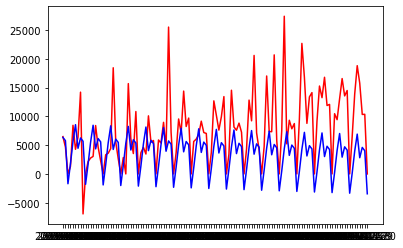

In [19]:
plt.plot(df_truth.date, df_truth.revenue, 'r')
plt.plot(df_rev.ds, df_rev.yhat, 'b')
plt.show()

## Create and load ARIMA forecasts

In [21]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

df_train = pd.read_csv("./data/cs_train/ts_data")
df_truth = pd.read_csv("./data/cs_production/ts_prod_data")
train = df_train[["revenue"]].values
test = df_truth[["revenue"]].values
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3306.016415, expected=6477.520000
predicted=4179.286541, expected=4666.740000
predicted=4038.205855, expected=0.000000
predicted=2528.421924, expected=1310.750000
predicted=2039.776797, expected=8444.060000
predicted=4182.366884, expected=4280.670000
predicted=4507.075557, expected=6398.080000
predicted=4557.601439, expected=14197.550000
predicted=6918.570461, expected=-6946.440000
predicted=2744.627797, expected=0.000000
predicted=3514.124960, expected=2148.460000
predicted=3798.253599, expected=2759.840000
predicted=2329.934709, expected=3041.850000
predicted=4295.874180, expected=8401.740000
predicted=1830.652615, expected=4655.230000
predicted=3596.054905, expected=2273.590000
predicted=3397.823618, expected=0.000000
predicted=3116.613796, expected=3326.300000
predicted=3184.514141, expected=3599.880000
predicted=4179.849684, expected=4402.640000
predicted=3342.919363, expected=18434.440000
predicted=7198.526514, expected=5540.050000
predicted=5871.753874, expected=2623.5

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=8335.877721, expected=27382.570000
predicted=12751.098735, expected=5220.540000
predicted=11895.014483, expected=9318.440000
predicted=8726.686265, expected=7837.720000
predicted=9363.588222, expected=8744.890000
predicted=8972.310046, expected=0.000000
predicted=10692.896727, expected=9458.880000
predicted=6602.638028, expected=22665.750000
predicted=11907.832956, expected=16788.070000
predicted=11522.974896, expected=8781.160000
predicted=11016.978495, expected=13371.500000
predicted=11227.509048, expected=14116.550000
predicted=13420.970497, expected=0.000000
predicted=11538.515455, expected=9141.780000
predicted=10778.041004, expected=15262.540000
predicted=10984.336897, expected=13241.650000
predicted=10981.569151, expected=16784.080000
predicted=13187.703626, expected=11881.450000
predicted=10418.073719, expected=12070.650000
predicted=12247.456350, expected=0.000000
predicted=10474.517432, expected=10454.850000
predicted=10297.201253, expected=9420.890000
predicted=110

## MSE ARIMA 

In [27]:
error = mean_squared_error(test, predictions)
print("MSE for full time period: ", error)

error = mean_squared_error(test[0:6], predictions[0:6])
print("MSE for first week: ", error)

print("Error for the first day: ", predictions[0]-test[0])


MSE for full time period:  36627201.13612219
MSE for first week:  11518397.35820427
Error for the first day:  [-3171.50358526]


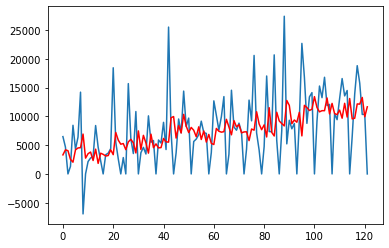

In [23]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# Conclusion

For the whole 5 month validation time period, the following MSE's were achieved for revenues:
* PROPHET: 3.7*10^7
* ARIMA:   4.6*10^7

For the first prediction week, the MSE was:
* PROPHET: 4.9*10^6
* ARIMA:   1.2*10^7

For the first prediction day, the error was:
* PROPHET: -100
* ARIMA: -3000

Therefore, as a conclusion, can be said that Prophet performed better than ARIMA.